In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/santander-kaggle/train.csv')
sub = pd.read_csv('../data/santander-kaggle/sample_submission.csv')

In [18]:
df.index = df.ID_code
df = df.drop(['ID_code'], axis=1)

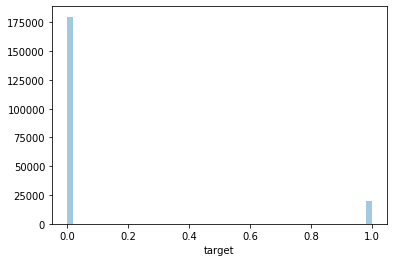

In [4]:
sns.distplot(df.target, kde=False)

In [34]:
# Just run a Rnadom Forest Classifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
traindf, testdf = train_test_split(df, test_size=0.1)
train_x = traindf.drop(['target'],axis=1)
train_y = traindf.target

In [64]:
model = RandomForestClassifier(n_estimators=50, max_depth=8, max_features=0.1)
#model = DecisionTreeClassifier(max_depth=8, max_features)

In [36]:
scores = cross_validate(model, train_x, train_y, cv=3, scoring='roc_auc')

In [65]:
model.fit(train_x, train_y)

Wall time: 1min 20s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=0.1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
actual_y = testdf.target
predicted_y = model.predict(testdf.drop(['target'], axis=1))
predicted_y_prob = model.predict_proba(testdf.drop(['target'], axis=1))

In [68]:
print(roc_auc_score(actual_y, predicted_y_prob[:,1]))
print(roc_auc_score(actual_y, predicted_y))

0.7724307794626231
0.5


In [69]:
model.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 0.1,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}